In [3]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

#pip install seaborn
import seaborn as sns

loaddata = pd.read_csv(r'D:\Python\dataset\nyc-rolling-sales.csv')
print ('Data imported')

loaddata.head()

Data imported


,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,...,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,...,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,...,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,...,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


In [4]:
loaddata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Unnamed: 0                      84548 non-null  int64 
 1   BOROUGH                         84548 non-null  int64 
 2   NEIGHBORHOOD                    84548 non-null  object
 3   BUILDING CLASS CATEGORY         84548 non-null  object
 4   TAX CLASS AT PRESENT            84548 non-null  object
 5   BLOCK                           84548 non-null  int64 
 6   LOT                             84548 non-null  int64 
 7   EASE-MENT                       84548 non-null  object
 8   BUILDING CLASS AT PRESENT       84548 non-null  object
 9   ADDRESS                         84548 non-null  object
 10  APARTMENT NUMBER                84548 non-null  object
 11  ZIP CODE                        84548 non-null  int64 
 12  RESIDENTIAL UNITS               84548 non-null

In [6]:
print('Column name')
for col in loaddata.columns:
    if loaddata[col].dtype=='object':
        print(col, loaddata[col].nunique())

Column name
NEIGHBORHOOD 254
BUILDING CLASS CATEGORY 47
TAX CLASS AT PRESENT 11
EASE-MENT 1
BUILDING CLASS AT PRESENT 167
ADDRESS 67563
APARTMENT NUMBER 3989
LAND SQUARE FEET 6062
GROSS SQUARE FEET 5691
BUILDING CLASS AT TIME OF SALE 166
SALE PRICE 10008
SALE DATE 364


In [9]:
# LAND SQUARE FEET,GROSS SQUARE FEET, SALE PRICE, BOROUGH should be numeric. 
# SALE DATE datetime format.
# categorical: NEIGHBORHOOD, BUILDING CLASS CATEGORY, TAX CLASS AT PRESENT, BUILDING CLASS AT PRESENT,
# BUILDING CLASS AT TIME OF SALE, TAX CLASS AT TIME OF SALE,BOROUGH 

numeric = ['LAND SQUARE FEET','GROSS SQUARE FEET', 'SALE PRICE', 'BOROUGH']
for col in numeric: # coerce for missing values
    loaddata[col] = pd.to_numeric(loaddata[col], errors='coerce')

categ = ['NEIGHBORHOOD', 'BUILDING CLASS CATEGORY', 'TAX CLASS AT PRESENT', 'BUILDING CLASS AT PRESENT', 'BUILDING CLASS AT TIME OF SALE', 'TAX CLASS AT TIME OF SALE']
for col in categ:
    loaddata[col] = loaddata[col].astype('category')

loaddata['SALE DATE'] = pd.to_datetime(loaddata['SALE DATE'], errors='coerce')

In [14]:
missing = loaddata.isnull().sum()/len(loaddata)*100

print(pd.DataFrame([missing[missing>0],pd.Series(loaddata.isnull().sum()[loaddata.isnull().sum()>1000])], index=['percent missing','how many missing']))

                  LAND SQUARE FEET  GROSS SQUARE FEET   SALE PRICE
percent missing          31.049818          32.658372     17.22217
how many missing      26252.000000       27612.000000  14561.00000


In [16]:
#CHECK DUPLICATE
loaddata['LAND SQUARE FEET'] = loaddata['LAND SQUARE FEET'].mask((loaddata['LAND SQUARE FEET'].isnull()) & (loaddata['GROSS SQUARE FEET'].notnull()), loaddata['GROSS SQUARE FEET'])
loaddata['GROSS SQUARE FEET'] = loaddata['GROSS SQUARE FEET'].mask((loaddata['LAND SQUARE FEET'].notnull()) & (loaddata['GROSS SQUARE FEET'].isnull()), loaddata['LAND SQUARE FEET'])

print(sum(loaddata.duplicated()))

loaddata[loaddata.duplicated(keep=False)].sort_values(['NEIGHBORHOOD', 'ADDRESS']).head(10)

0


,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE


In [17]:
#Exploratory
loaddata[loaddata['COMMERCIAL UNITS']==0].describe()

,Unnamed: 0,BOROUGH,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,SALE PRICE
count,79429.000000,79429.000000,79429.000000,79429.000000,79429.000000,79429.000000,79429.0,79429.000000,5.323700e+04,5.323700e+04,79429.000000,6.592400e+04
mean,10353.817711,3.004797,4270.584018,395.803699,10721.690503,1.717257,0.0,1.750217,3.171489e+03,2.777222e+03,1780.395787,9.917650e+05
std,7140.985796,1.299437,3588.993150,671.927040,1320.121756,10.146362,0.0,10.142353,2.924843e+04,2.799603e+04,551.999810,3.322537e+06
min,4.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.0,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00
25%,4256.000000,2.000000,1330.000000,23.000000,10304.000000,0.000000,0.0,1.000000,1.600000e+03,9.780000e+02,1920.000000,2.350000e+05
50%,8964.000000,3.000000,3335.000000,52.000000,11209.000000,1.000000,0.0,1.000000,2.300000e+03,1.600000e+03,1940.000000,5.250000e+05
75%,15980.000000,4.000000,6354.000000,1003.000000,11357.000000,2.000000,0.0,2.000000,3.318000e+03,2.393000e+03,1967.000000,9.200000e+05
max,26739.000000,5.000000,16322.000000,9106.000000,11694.000000,889.000000,0.0,889.000000,4.252327e+06,4.252327e+06,2017.000000,3.450000e+08


In [25]:
def median_home_price_each_borough(borough):
    sale_prices = loaddata[loaddata['BOROUGH'] == borough]['SALE PRICE'].dropna()
    sale_prices = [price for price in sale_prices if price > 10]
    return np.median(sale_prices)

# Graded-Funtion Begin (~1 Lines)
boroughs = sorted(loaddata['BOROUGH'].unique())
med_borough_prices = [median_home_price_each_borough(borough) for borough in boroughs]
print(med_borough_prices)

[1166500.0, 405000.0, 770000.0, 500000.0, 468468.0]


In [18]:
#calculate the median for each Borough

def mean_home_price_each_borough(borough):
    sale_prices = loaddata[loaddata['BOROUGH'] == borough]['SALE PRICE'].dropna()
    sale_prices = [price for price in sale_prices if price > 10]
    return np.mean(sale_prices)

# Graded-Funtion Begin (~1 Lines)
boroughs = sorted(loaddata['BOROUGH'].unique())
avg_borough_prices = [mean_home_price_each_borough(borough) for borough in boroughs]
print(avg_borough_prices)

[3368041.7479385044, 821701.3723089078, 1303301.8979021888, 750572.2234996425, 553415.188209385]


In [19]:
#calculate the Range for each Borough.

def mode_home_price_each_borough(borough):
    sale_prices = loaddata[loaddata['BOROUGH'] == borough]['SALE PRICE'].dropna()
    sale_prices = [price for price in sale_prices if price > 10]
    vals,counts = np.unique(sale_prices, return_counts=True)
    index = np.argmax(counts)
    return vals[index]

boroughs = sorted(loaddata['BOROUGH'].unique())
mode_borough_prices = [mode_home_price_each_borough(borough) for borough in boroughs]
print(mode_borough_prices)

[1100000.0, 500000.0, 650000.0, 450000.0, 450000.0]


In [20]:
#calculate the Variance for each Borough.

def rank_home_price_each_borough(borough):
    sale_prices = loaddata[loaddata['BOROUGH'] == borough]['SALE PRICE'].dropna()
    sale_prices = [price for price in sale_prices if price > 10]
    array = np.array(sale_prices)
    temp = array.argsort()
    ranks = temp.argsort()
    return ranks


boroughs = sorted(loaddata['BOROUGH'].unique())
ranks_borough_prices = [rank_home_price_each_borough(borough) for borough in boroughs]
print(ranks_borough_prices)

[array([13115, 12112, 13402, ...,  1195,  9955, 13334], dtype=int64), array([ 679, 2619,  586, ...,  489, 4670, 4737], dtype=int64), array([ 8047, 11161, 10609, ..., 13537, 15122, 14509], dtype=int64), array([13770,  4097, 15657, ..., 17977, 17796, 14254], dtype=int64), array([2586, 4232, 1838, ..., 2838, 5897,  119], dtype=int64)]


In [21]:
#calculate the SD for each Borough.

def variance_home_price_each_borough(borough):
    sale_prices = loaddata[loaddata['BOROUGH'] == borough]['SALE PRICE'].dropna()
    sale_prices = [price for price in sale_prices if price > 10]
    return np.var(sale_prices)

# Graded-Funtion Begin (~1 Lines)
boroughs = sorted(loaddata['BOROUGH'].unique())
var_borough_prices = [variance_home_price_each_borough(borough) for borough in boroughs]
print(var_borough_prices)

[585796024300787.0, 10591846655975.816, 23581215475427.066, 10600147046206.943, 3676769502381.4014]


In [22]:
#Probability Distibution 
def std_home_price_each_borough(borough):
    sale_prices = loaddata[loaddata['BOROUGH'] == borough]['SALE PRICE'].dropna()
    sale_prices = [price for price in sale_prices if price > 10]
    return np.std(sale_prices)

# Graded-Funtion Begin (~1 Lines)
boroughs = sorted(loaddata['BOROUGH'].unique())
std_borough_prices = [std_home_price_each_borough(borough) for borough in boroughs]
print(std_borough_prices)

[24203223.427898753, 3254511.738491016, 4856049.369129918, 3255786.701583343, 1917490.4178069318]


In [23]:
df1 = loaddata['BOROUGH'].groupby(loaddata['BOROUGH']).value_counts()
df1

BOROUGH  BOROUGH
1        1          18306
2        2           7049
3        3          24047
4        4          26736
5        5           8410
Name: BOROUGH, dtype: int64

In [26]:
mean_manhattan = mean_home_price_each_borough(1)
mode_manhattan = mode_home_price_each_borough(1)
median_manhattan = median_home_price_each_borough(1)
rank_manhattan = rank_home_price_each_borough(1)
std_manhattan = std_home_price_each_borough(1)

print("Mean of Home Price in Manhattan: ", mean_manhattan)
print("Mode of Home Price in Manhattan: ",mode_manhattan)
print("Median of Home Price in Manhattan: ",median_manhattan)

Mean of Home Price in Manhattan:  3368041.7479385044
Mode of Home Price in Manhattan:  1100000.0
Median of Home Price in Manhattan:  1166500.0


In [ ]:
#One example is using the data for borough 1 (Manhattan).

#Mean = 3,373,272.72803817 Median = 1,175,000.0 Mode = 1,100,000.0

In [27]:
%matplotlib inline 
import matplotlib 
import matplotlib.pyplot as plt 
from IPython.display import Math, Latex 
from IPython.core.display import Image   
import seaborn as sns 

sns.set(color_codes=True)
sns.set(rc={'figure.figsize':(5,5)})

C:\Users\Dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 0, 'Uniform Distribution '), Text(0, 0.5, 'Frequency')]

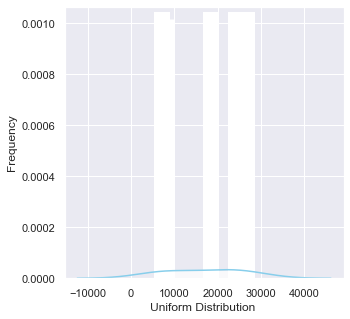

In [28]:
ax = sns.distplot(df1, 
bins=100, 
kde=True, 
color='skyblue', 
hist_kws={"linewidth": 15,'alpha':1}) 
ax.set(xlabel='Uniform Distribution ', ylabel='Frequency')

In [29]:
dx = loaddata[['BOROUGH','SALE PRICE']].dropna()
print(dx)

pdcross = pd.crosstab(dx['SALE PRICE'], dx['BOROUGH'])
print(pdcross)

       BOROUGH  SALE PRICE
0            1   6625000.0
3            1   3936272.0
4            1   8000000.0
6            1   3192840.0
9            1  16232000.0
...        ...         ...
84543        5    450000.0
84544        5    550000.0
84545        5    460000.0
84546        5  11693337.0
84547        5     69300.0

[69987 rows x 2 columns]
BOROUGH        1     2     3   4  5
SALE PRICE                         
0.000000e+00   0  1871  8357   0  0
1.000000e+00  32    22    41  30  9
2.000000e+00   2     0     0   1  0
3.000000e+00   0     1     0   1  0
5.000000e+00   0     0     1   0  0
...           ..   ...   ...  .. ..
5.650000e+08   1     0     0   0  0
6.200000e+08   1     0     0   0  0
6.520000e+08   1     0     0   0  0
1.040000e+09   1     0     0   0  0
2.210000e+09   1     0     0   0  0

[10007 rows x 5 columns]


In [30]:
p_fm = 1826/(1826+22)
p_fm

0.9880952380952381

In [31]:
n = 1826+22
n

1848

In [32]:
br2 = np.sqrt(p_fm * (1-p_fm) /n )
br2

0.002522950772404102

In [33]:
z_score = 1.96
lcb = p_fm - z_score * br2 #lower limit of the CI
ucb = p_fm + z_score * br2 #upper limit of the CI

print('Confidence Interval ',lcb,ucb)

Confidence Interval  0.9831502545813261 0.9930402216091502


In [35]:
#pip install statsmodels

import statsmodels.api as sm 
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd

In [36]:
loaddata

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,5,0,5,1633.0,6440.0,1900,2,C2,6625000.0,2017-07-19
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,...,28,3,31,4616.0,18690.0,1900,2,C7,NaN,2016-12-14
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,...,16,1,17,2212.0,7803.0,1900,2,C7,NaN,2016-12-09
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,...,10,0,10,2272.0,6794.0,1913,2,C4,3936272.0,2016-09-23
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,...,6,0,6,2369.0,4615.0,1900,2,C2,8000000.0,2016-11-17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84543,8409,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,34,,B9,37 QUAIL LANE,...,2,0,2,2400.0,2575.0,1998,1,B9,450000.0,2016-11-28
84544,8410,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,78,,B9,32 PHEASANT LANE,...,2,0,2,2498.0,2377.0,1998,1,B9,550000.0,2017-04-21
84545,8411,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7351,60,,B2,49 PITNEY AVENUE,...,2,0,2,4000.0,1496.0,1925,1,B2,460000.0,2017-07-05
84546,8412,5,WOODROW,22 STORE BUILDINGS,4,7100,28,,K6,2730 ARTHUR KILL ROAD,...,0,7,7,208033.0,64117.0,2001,4,K6,11693337.0,2016-12-21


In [38]:
b1 = loaddata[loaddata['BOROUGH'] == 4] 
b2 = loaddata[loaddata['BOROUGH'] == 3]

# Graded-Funtion Begin

n1 = len(b1) 
mu1 = b1["SALE PRICE"].mean() 
sd1 = b1["SALE PRICE"].std()  

n2 = len(b2) 
mu2 = b2["SALE PRICE"].mean() 
sd2 = b2["SALE PRICE"].std()  

print(n1, mu1, sd1) 
print(n2, mu2, sd2)

26736 739908.6159102 3233883.556178568
24047 834488.3717719465 3935813.4285697187


In [39]:
sm.stats.ztest(b1["SALE PRICE"].dropna(), b2["SALE PRICE"].dropna(),alternative='two-sided')

(-2.6488563571165837, 0.0080764651142228)